# Grid Search

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the libraries

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head() #let's see our data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
dataset.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


There are no missing values

Taking all columns except the last one for input X training

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

### For assuring best model optimization we scaling the data

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernel SVM model on the Training set

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', probability=True, random_state = 0)
classifier.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Making the Confusion Matrix

Confussion Matrix Values: 
[[64  4]
 [ 3 29]]
Accuracy score: 0.93

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



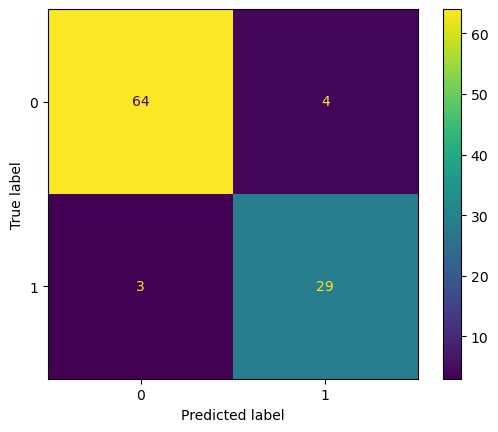

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Confussion Matrix Values: \n{cm}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}\n")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

C:\Users\santi\AppData\Local\Temp\ipykernel_2876\397542615.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


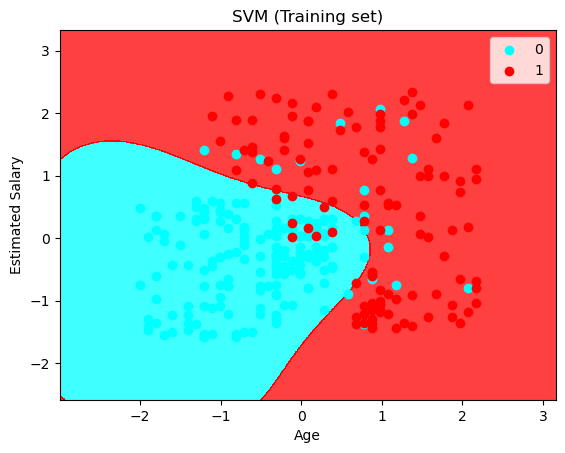

In [9]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('cyan', 'red'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\santi\AppData\Local\Temp\ipykernel_2876\709164973.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


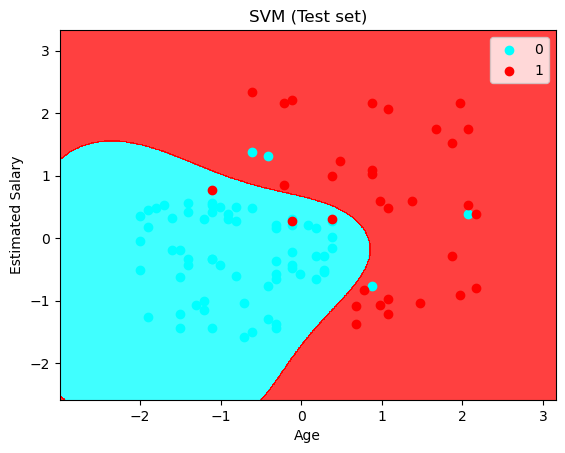

In [10]:
# Visualising the Test set results for 'rbf' Kernel
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('cyan', 'red'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

- ### According the characteristics of age and Estimated salary we determine a good model for predicting 0 = not purchased and 1 for purchased, we can say that we predicted more TN than TP because the imbalanced data.
- ### Despite this, we have good predictions.
###

## Applying k-Fold Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) #as we saw above, we need to stratified data, we use cv for stratified data
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


## Applying Grid Search to find the best model and hiperparameters

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#---------If you haven´t scaled yet use the pipeline and use clf__C, clf__kernel, clf__gamma
# pipe= Pipeline([
#     ("Scaler", StandardScaler())
#     ("clf", 'linear', 'rbf', 'gamma')
    
# ])
c_values= np.random.uniform(0.1, 10, 20)
gamma_values= np.random.uniform(0.1, 10, 50)
parameters = [{'C': c_values,  #used this before  [0.25, 0.5, 0.75, 1]
               'kernel': ['linear']},  
              {'C': c_values,   #used this before  [0.25, 0.5, 0.75, 1]
               'kernel': ['rbf'],
               'gamma': gamma_values}] #used this before [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

grid_search = GridSearchCV(estimator = classifier,  #Using same clasifier SVC
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 91.33 %
Best Parameters: {'C': 1.8052766316241506, 'gamma': 5.5364345915092255, 'kernel': 'rbf'}


See and save model

In [18]:
import joblib
print(best_model)
joblib.dump(best_model, "best_svm_pipeline.joblib", compress=3)
print("Saved to best_svm_pipeline.joblib")

SVC(C=1.8052766316241506, gamma=5.5364345915092255, probability=True,
    random_state=0)
Saved to best_svm_pipeline.joblib


## Visualising the Training set results

C:\Users\santi\AppData\Local\Temp\ipykernel_2876\2638172565.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


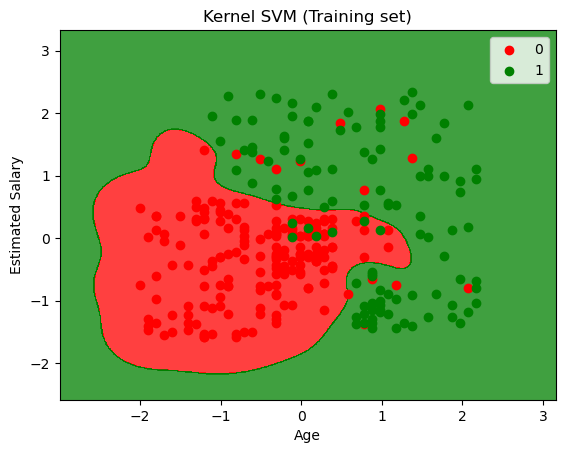

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, best_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), #best_model vs initial classifier(change to classifier for seeing this)
             alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

C:\Users\santi\AppData\Local\Temp\ipykernel_2876\1277643873.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


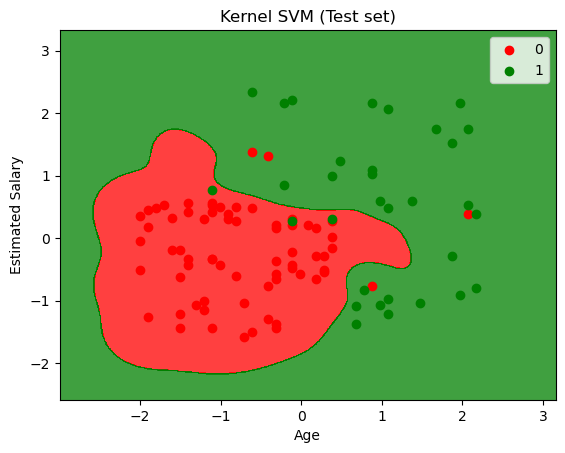

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, best_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import  roc_auc_score, average_precision_score

y_hat  = best_model.predict(X_test)
acc    = accuracy_score(y_test, y_hat)
print(f"Test Accuracy: {acc:.3f}")

proba  = best_model.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, proba))
print("PR-AUC :", average_precision_score(y_test, proba))

print("Confusion matrix:\n", confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat, digits=3))

Test Accuracy: 0.930
ROC-AUC: 0.9549632352941176
PR-AUC : 0.8825611546963221
Confusion matrix:
 [[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0      0.955     0.941     0.948        68
           1      0.879     0.906     0.892        32

    accuracy                          0.930       100
   macro avg      0.917     0.924     0.920       100
weighted avg      0.931     0.930     0.930       100



- ## As we can observe from the figure above and the metrics, the classifier with kernel rbf improved the accuracy by just a little bit. Thus is still better but with higher computational cost than just using rbf with random hiperparameters for SVC.
- ## We handle imbalanced data with PR metrics and confusion matrix, which seems to have a good generalization and performance.